In [23]:
import albumentations as A
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

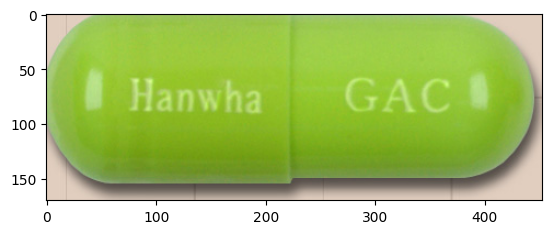

In [11]:
img = cv2.imread('198701126_1.png')
plt.imshow(img)
plt.show()

In [12]:
pillow_img = Image.open('198701126_1.png')
image = np.array(pillow_img)

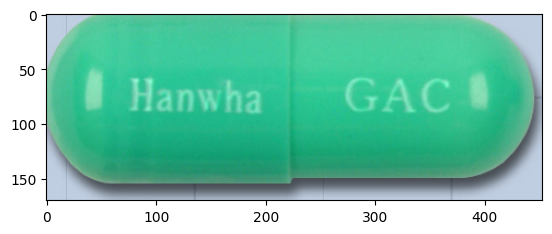

In [14]:
plt.imshow(image)

In [31]:
import pandas as pd

In [53]:
transform = A.Compose([
    A.RandomCrop(width = 100, height = 100),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

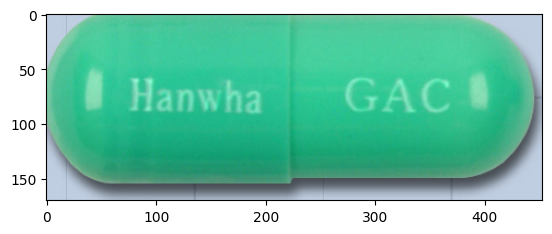

In [54]:
plt.imshow(image)

In [55]:
img.shape

(170, 453, 3)

In [56]:
transformed = transform(image = image)

In [57]:
transformed_image = transformed["image"]

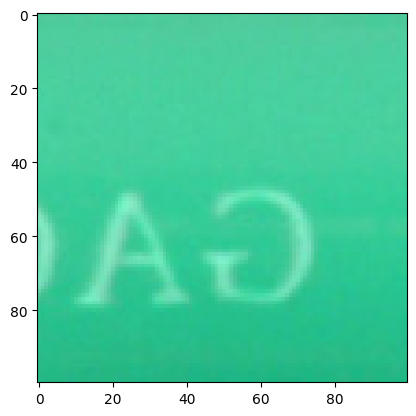

In [71]:
plt.imshow(transformed_image)